## SEIR model
![](https://github.com/francescocicala/stochastic-modelling-playground/blob/master/images/seir.png?raw=true)
Sketch by Prof. Bortolussi

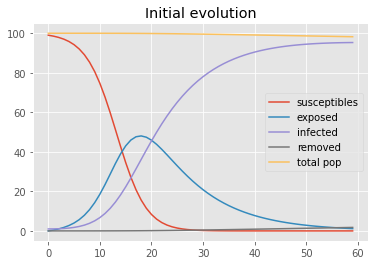

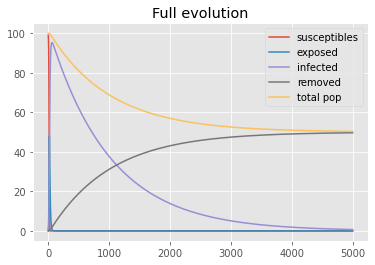

In [1]:
from models.helpers import evolve, show
from models.models import SEIR
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

# Instantiate the model
model = SEIR()

# Parameters
alpha = 0.001 # rate of people leaving the infected (dead or recovered)
beta = 0.004 # rate of people leaving the susceptibles per infected
epsilon_E = 0.8 # rate of exposed people who are infectious
k = 0.1 # rate of people leaving the exposed
f = 0.5 # rate of people stopping being infected who survive

deriv_params = (alpha, beta, epsilon_E, k, f) # same order as in the deriv function's arguments

# Initial conditions
N0 = 100
S0 = 99
E0 = 0
I0 = 1
R0 = 0
state0 = np.asarray([S0, E0, I0, R0, N0])

# Evolve
timelength = 5000
history = evolve(model, state0, timelength, deriv_params)

# Visualize
legend = model.get_var_names()
show(history, legend=legend, title='Initial evolution', last_t=60)
show(history, legend=legend, title='Full evolution')